# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [86]:
import warnings

In [87]:
warnings.filterwarnings('ignore')

In [3]:
paysim = pd.read_csv('../PS_20174392719_1491204439457_log.csv')

In [4]:
paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [38]:
paysim.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
paysim.shape

(6362620, 11)

In [14]:
paysim['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [15]:
paysim['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

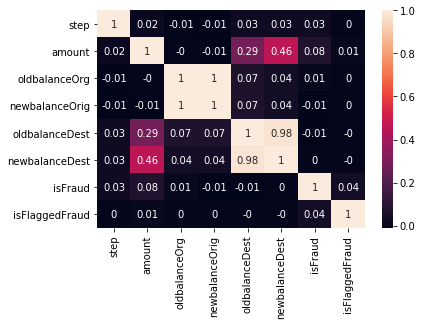

In [19]:
sns.heatmap(round(paysim.corr(),2),annot=True)

In [28]:
paysim.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [33]:
# Create a new df to put log converted data

paysim_log = paysim.copy()

In [36]:
# Change scale to log

paysim_log['amount_log'] = paysim_log['amount'].apply(lambda x: np.log(x) if x != 0 else x)
paysim_log['oldbalanceOrg_log'] = paysim_log['oldbalanceOrg'].apply(lambda x: np.log(x) if x != 0 else x)
paysim_log['newbalanceOrig_log'] = paysim_log['newbalanceOrig'].apply(lambda x: np.log(x) if x != 0 else x)
paysim_log['oldbalanceDest_log'] = paysim_log['oldbalanceDest'].apply(lambda x: np.log(x) if x != 0 else x)
paysim_log['newbalanceDest_log'] = paysim_log['newbalanceDest'].apply(lambda x: np.log(x) if x != 0 else x)

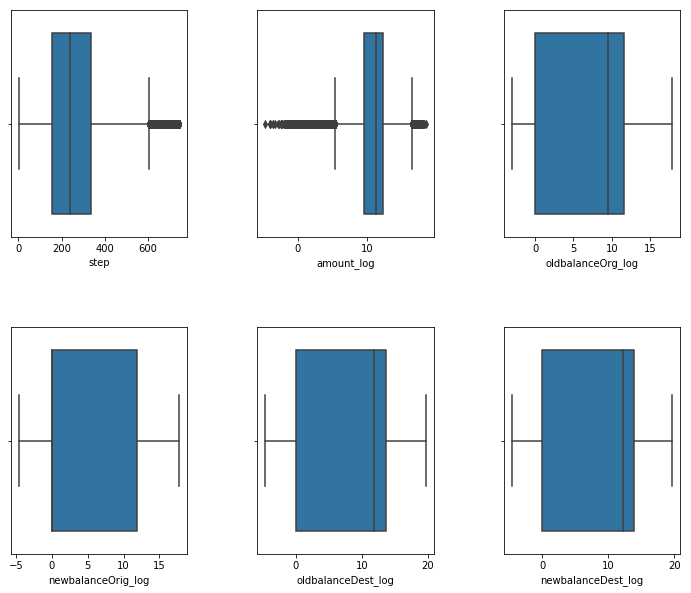

In [37]:
f, ax = plt.subplots(2,3, figsize=(12,10))

cols = ['step', 'amount_log', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log']

plt.subplots_adjust(wspace=0.4,hspace=0.4)

i = 0
for row in ax:
    for col in row:
        sns.boxplot(paysim_log[cols[i]], ax=col)
        i += 1

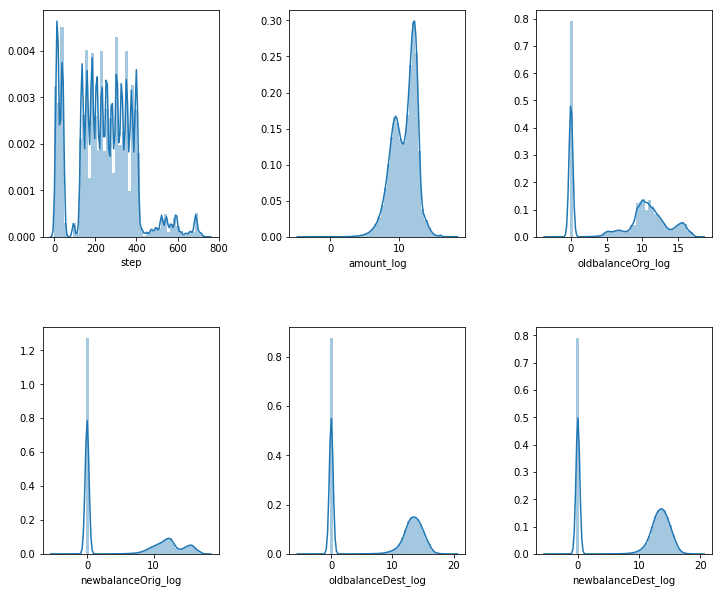

In [40]:
f, ax = plt.subplots(2,3, figsize=(12,10))

cols = ['step', 'amount_log', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log']

plt.subplots_adjust(wspace=0.4,hspace=0.4)

i = 0
for row in ax:
    for col in row:
        sns.distplot(paysim_log[cols[i]], ax=col)
        i += 1

### What is the distribution of the outcome? 

In [39]:
paysim['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [41]:
paysim.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Logistic regression (with normal train_test_split)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = paysim_log[['step', 'amount_log', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log']]

In [44]:
y = paysim_log['isFraud']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_model = LogisticRegression()

In [48]:
log_model.fit(X_train,y_train)

c:\users\roger\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
log_model.score(X_test,y_test)

0.9993598025132204

### Logistic regression (oversampling)

In [52]:
# Divide dataframe by class
paysim_class_0 = paysim_log[paysim_log['isFraud'] == 0]
paysim_class_1 = paysim_log[paysim_log['isFraud'] == 1]

In [53]:
count_class_0, count_class_1 = paysim_log['isFraud'].value_counts()

In [56]:
count_class_0, count_class_1

(6354407, 8213)

In [57]:
# Multiply data from class 1 in order to have same number of values as class 0
paysim_class_1_over = paysim_class_1.sample(count_class_0, replace=True)

# concatenate dfs
df_test_over = pd.concat([paysim_class_0, paysim_class_1_over], axis=0)

In [58]:
df_test_over['isFraud'].value_counts()

1    6354407
0    6354407
Name: isFraud, dtype: int64

In [59]:
X = df_test_over[['step', 'amount_log', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log']]
y = df_test_over['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
log_model.fit(X_train,y_train)

c:\users\roger\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
log_model.score(X_test,y_test)

0.9351539416861523

In [65]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
y_pred = log_model.predict(X_test)

In [64]:
confusion_matrix(y_test,y_pred)

array([[1765854,  140485],
       [ 106750, 1799556]], dtype=int64)

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93   1906339
           1       0.93      0.94      0.94   1906306

   micro avg       0.94      0.94      0.94   3812645
   macro avg       0.94      0.94      0.94   3812645
weighted avg       0.94      0.94      0.94   3812645



### Logistic regression (undersampling)

In [70]:
count_class_0, count_class_1

(6354407, 8213)

In [71]:
# Divide data from class 1 in order to have same number of values as class 0
paysim_class_0_under = paysim_class_0.sample(count_class_1)

# concatenate dfs
df_test_under = pd.concat([paysim_class_0_under, paysim_class_1], axis=0)

In [72]:
df_test_under['isFraud'].value_counts()

1    8213
0    8213
Name: isFraud, dtype: int64

In [73]:
X = df_test_under[['step', 'amount_log', 'oldbalanceOrg_log', 'newbalanceOrig_log', 'oldbalanceDest_log', 'newbalanceDest_log']]
y = df_test_under['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
log_model.fit(X_train,y_train)

c:\users\roger\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
log_model.score(X_test,y_test)

0.9326298701298701

### Logistic regression (undersampling) with cross-validation

In [76]:
from sklearn.model_selection import cross_val_score

In [88]:
cv = cross_val_score(LogisticRegression(),X_test,y_test,cv=10)

In [89]:
np.mean(cv)

0.9306007113850526

### Now pick a model of your choice and evaluate its accuracy.

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
cv_knn = cross_val_score(KNeighborsClassifier(),X_test,y_test,cv=10)

In [95]:
np.mean(cv_knn)

0.924104055555785

In [97]:
# CHECKING BEST PARAMETER COMBINATION FOR KNN classifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

# Parameters to try
parameter_grid = {'n_neighbors': list(range(1,10))}
                  

# Instantiate stratified cross validation
cross_validation = KFold(n_splits=5)

# Create grid search object
grid_search = GridSearchCV(knn,
                           param_grid=parameter_grid,
                           cv=cross_validation)

# Fit model with grid_search
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9403374499913029
Best parameters: {'n_neighbors': 3}


In [98]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
# CHECKING BEST PARAMETER COMBINATION FOR KNN classifier

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

# Parameters to try
parameter_grid = {'max_features':[1,2,3,4,5],
                  'max_depth':[1,2,3,4,5]}
                  

# Instantiate stratified cross validation
cross_validation = KFold(n_splits=5)

# Create grid search object
grid_search = GridSearchCV(rf,
                           param_grid=parameter_grid,
                           cv=cross_validation)

# Fit model with grid_search
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9693859801704644
Best parameters: {'max_depth': 5, 'max_features': 5}


In [101]:
rf_cv = cross_val_score(RandomForestClassifier(max_features=5,max_depth=5),X_test,y_test,cv=10)

In [103]:
np.mean(rf_cv)

0.969564947968091

### Which model worked better and how do you know?

In [104]:
# The model that worked better is the random forest classifier with max_features = 5 and max_depth = 5, and an accuarcy of 0.97